In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.system('ls')

Au_MNL_dynasor_outT300_GL.m
Clt_k_t.png
Clt_k_w_34.png
Clt_k_w_56.png
DSF.ipynb
DSF_reader.ipynb
Structure_factor.ipynb
Untitled.ipynb
Untitled1.ipynb
dump_5frame.lmc
dumps-3_NVE.lmc
dynsf_outT1400_dynamical_old.m
dynsf_outT300_GK_old.m
frame-1.lmc
in_equillibration.thermal
plotter_dynamical.m


0

In [3]:
filename = "dynsf_outT1400_dynamical_old.m"

# Open the file and read the lines
with open(filename, "r") as f:
    lines = f.readlines()
    Total_lines = len(lines)                    # Total no. of lines
    print('Total lines:', Total_lines)

lines = [lines.replace('[', '').replace(']', '').replace(';', '') for lines in lines]

Total lines: 14047


In [4]:
# Loop over the lines to index 
index = []
for i in range(len(lines)):
    line = lines[i]
    if line.startswith("%"):
        index.append(i+1)
index.append(Total_lines)   # adding total number of lines
index = np.array(index)

In [5]:
vars_dict = {}
count = 0
for j in range(len(lines)):
    line = lines[j]
    if line.startswith("%"):
        var_name = lines[j+1].split()[0]; #print(j, var_name, count)
        plines = lines[index[count]+1:index[count+1]-2]
#         print(index[count]+1, index[count+1]-2)
        var_val = np.array([list(map(float, line.strip().split())) for line in plines])
        vars_dict[var_name] = var_val
        count = count +1; 
print('Dictionary keys \n', vars_dict.keys())

# # Correcting the final variable:
plines = lines[index[-2]+1:]
vars_dict['Ct_k_w_0_0'] = np.array([list(map(float, line.strip().split())) for line in plines])

Dictionary keys 
 dict_keys(['k', 't', 'k_bin_count', 'F_k_t_0_0', 'Cl_k_t_0_0', 'Ct_k_t_0_0', 'r', 'G_r_t_0_0', 'w', 'S_k_w_0_0', 'Cl_k_w_0_0', 'Ct_k_w_0_0'])


In [6]:
k_val = vars_dict['k'].T; 
time = vars_dict['t'].T
k_bin_count = vars_dict['k_bin_count'].T
F_k_t_0_0 = vars_dict['F_k_t_0_0'].T
Cl_k_t_0_0 = vars_dict['Cl_k_t_0_0'].T
Ct_k_t_0_0 =vars_dict['Ct_k_t_0_0'].T
r = vars_dict['r'].T
G_r_t_0_0 = vars_dict['G_r_t_0_0'].T
w = vars_dict['w'].T
S_k_w_0_0 = vars_dict['S_k_w_0_0'].T
Cl_k_w_0_0 = vars_dict['Cl_k_w_0_0'].T
Ct_k_w_0_0 = vars_dict['Ct_k_w_0_0'].T

print('k_val:', k_val.shape)
print('time:', time.shape)
print('k_bin_count:',k_bin_count.shape)
print('F_k_t_0_0:', F_k_t_0_0.shape)
print('Cl_k_t_0_0:', Cl_k_t_0_0.shape)
print('Ct_k_t_0_0:', Ct_k_t_0_0.shape)
print('r:',r.shape)
print('G_r_t_0_0:', G_r_t_0_0.shape)
print('w:',w.shape)
print('S_k_w_0_0:',S_k_w_0_0.shape)
print('Cl_k_w_0_0:',Cl_k_w_0_0.shape)
print('Ct_k_w_0_0:',Ct_k_w_0_0.shape)

k_val: (92, 1)
time: (2001, 1)
k_bin_count: (92, 1)
F_k_t_0_0: (92, 2001)
Cl_k_t_0_0: (92, 2001)
Ct_k_t_0_0: (92, 2001)
r: (1, 1)
G_r_t_0_0: (1, 2001)
w: (2001, 1)
S_k_w_0_0: (92, 2001)
Cl_k_w_0_0: (92, 2001)
Ct_k_w_0_0: (92, 2001)


# Notes:
The original k-values are in nm-1 \
It is not necessary to do k_val[34]*a/(2*np.pi))

k-value: [0.26886851]


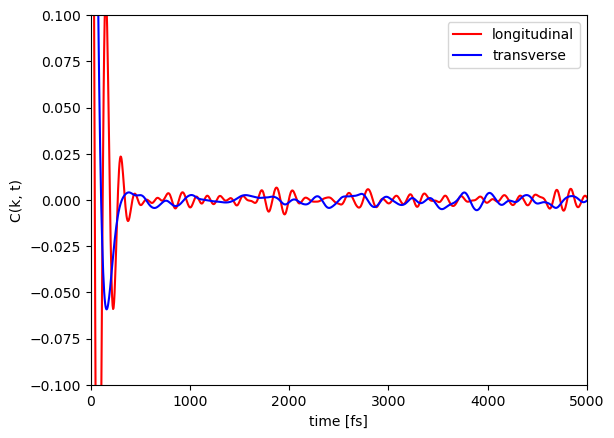

k-value: [0.98305048]


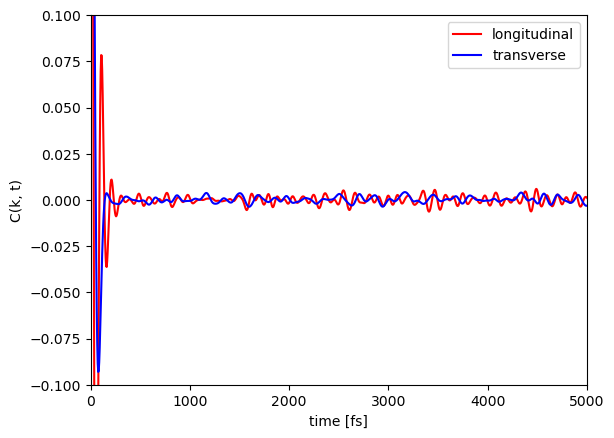

In [7]:
a = 4.065/10  # nm
print('k-value:', k_val[5]*a/(2*np.pi))
plt.plot(time, Cl_k_t_0_0[15, :].T, '-r', label='longitudinal')
plt.plot(time, Ct_k_t_0_0[15, :].T, '-b', label='transverse')
plt.xlabel('time [fs]')
plt.ylabel('C(k, t)')
plt.xlim(0, 5000)
plt.ylim(-.1, .1)
plt.savefig("Clt_k_t.png", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.legend()
plt.show()

print('k-value:', k_val[56]*a/(2*np.pi))
plt.plot(time, Cl_k_t_0_0[56, :].T, '-r', label='longitudinal')
plt.plot(time, Ct_k_t_0_0[56, :].T, '-b', label='transverse')
plt.xlim(0, 5000)
plt.ylim(-.1, .1)
plt.xlabel('time [fs]')
plt.ylabel('C(k, t)')
plt.legend()
plt.show()

k-value: [0.97464834]


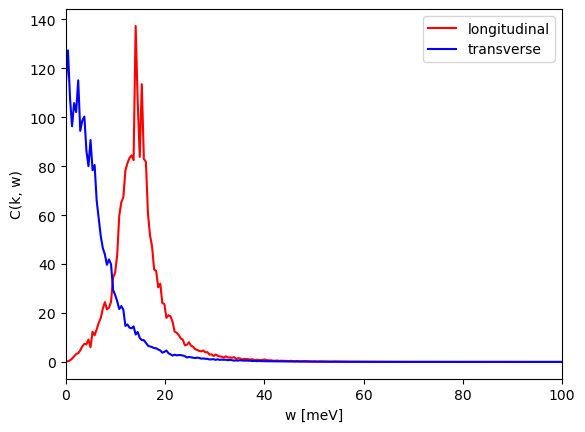

k-value: [0.98305048]


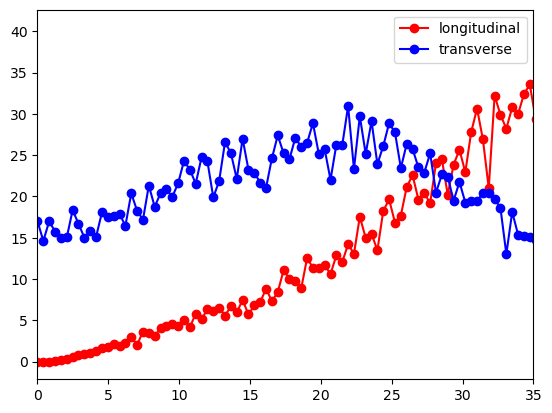

In [12]:
hbar = 1.05457173*1e-34  # J/s
J2ev = 6.2415e18         # 1 J = 6.2415*10^18 eV

w_plt = hbar*w*J2ev*1000*1e15    # meV

print('k-value:', k_val[55]*a/(2*np.pi))
plt.plot(w_plt, Cl_k_w_0_0[5, :].T, '-r',label='longitudinal')
plt.plot(w_plt, Ct_k_w_0_0[5, :].T, '-b', label='transverse')
plt.xlim(0, 100)
plt.xlabel('w [meV]')
plt.ylabel('C(k, w)')
plt.legend()
plt.savefig("Clt_k_w_34.png", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

print('k-value:', k_val[56]*a/(2*np.pi))
plt.plot(w_plt, Cl_k_w_0_0[56, :].T, 'o-r',label='longitudinal')
plt.plot(w_plt, Ct_k_w_0_0[56, :].T, 'o-b', label='transverse')
plt.xlim(0, 35)
plt.legend()
plt.savefig("Clt_k_w_56.png", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()